In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv('data/bigmartsales.csv')
# https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data

In [5]:
data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
3625,DRE37,13.500,Low Fat,0.094220,Soft Drinks,190.0,OUT046,1997,Small,Tier1,Supermarket Type1,1323.6104,14.5
7153,FDZ36,6.035,Regular,0.065784,Baking Goods,188.2,OUT046,1997,Small,Tier1,Supermarket Type1,5779.1440,12.9
3772,FDU39,18.850,Low Fat,0.036185,Meat,58.6,OUT018,2009,Medium,Tier 2,Supermarket Type2,770.3306,13.2
7499,FDE56,NaN,Regular,0.278731,Fruits and Vegetables,63.2,OUT019,1985,Small,Tier1,Grocery Store,247.6776,14.5
994,DRK11,8.210,Low Fat,0.010755,Hard Drinks,150.8,OUT013,1987,High,Tier 3,Supermarket Type1,2982.7840,12.1


In [7]:
data.shape

(8523, 13)

## Understand the data

    1. Understand the nature of data
		a. Univariate analysis:  This analysis is different based on the data types since Categorical data needs to be treated differently. The analysis contains Frequency (Frequency tables, Histograms), Dispersion (Range, IQR - Inter-quartile range, Standard deviation, Variance) and Central tendency measures (Mean, median, mode). 
			i. Numeric data
				1. Data split is done using dfn = df.select_dtypes(include=np.number)
				2. Analysis is done based on a single feature or column. Examples: Central tendency or measures of dispersion etc.
			ii. Categorical data
				1. Data split is done using dfc = df.select_dtypes(exclude=np.number)
				2. Analysis is done based on frequency counts
		b. Bivariate analysis
			i. Correlation: Similar to covariance; measures whether greater values of one
			variable correspond to greater values in the other. Scaled to always lie between +1 and -1. A measure of whether a linear relationship exists between two variables; ranges from +1 (positive linear relationship) to -1 (negative linear relationship). Independent variables exhibit zero
			correlation.
			ii. Covariance: Measures relationship between two variables, specifically whether greater values of one variable correspond to greater values in the other.
		c. Multivariate analysis
			i. Correlation matrix
			ii. Covariance matrix
            

### Univariate Analysis

In [9]:
# Splitting the data into numeric dataframes and categorical dataframes
num_data = data.select_dtypes(include=np.number)
cat_data = data.select_dtypes(exclude=np.number)

In [10]:
num_data.sample(5)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
2023,13.15,0.036729,179.8,1999,2535.3664,13.5
6642,15.20,0.012141,48.7,2002,680.4476,14.2
6243,11.10,0.000000,119.1,1997,1303.6364,10.5
1598,15.70,0.018969,62.0,2002,1225.0720,11.5
6012,7.60,0.238366,171.8,1998,852.2240,14.6


In [11]:
cat_data.sample(5)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
4077,FDP57,Low Fat,Snack Foods,OUT017,NaN,NaN,Supermarket Type1
3485,NCK31,Low Fat,Others,OUT046,Small,Tier1,Supermarket Type1
1727,FDR46,Low Fat,Snack Foods,OUT017,NaN,NaN,Supermarket Type1
2710,FDB32,Low Fat,Fruits and Vegetables,OUT035,Small,Tier1,Supermarket Type1
7822,FDM32,Low Fat,Fruits and Vegetables,OUT018,Medium,Tier 2,Supermarket Type2


In [12]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,7774.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.676740,0.066132,140.998838,1997.831867,2181.288914,13.414514
std,5.776851,0.051598,62.258099,8.371760,1706.499616,1.701840
min,0.000000,0.000000,31.300000,1985.000000,33.290000,0.100000
25%,7.720000,0.026989,93.800000,1987.000000,834.247400,13.150000
50%,11.800000,0.053931,142.700000,1999.000000,1794.331000,13.900000
75%,16.500000,0.094585,185.650000,2004.000000,3101.296400,14.300000
max,21.350000,0.328391,266.900000,2009.000000,13086.964800,24.000000


In [16]:
# Deviation with respect to mean
coefficient_of_varience  = num_data.std()/num_data.mean()
coefficient_of_varience

Item_Weight                  0.494732
Item_Visibility              0.780224
Item_MRP                     0.441550
Outlet_Establishment_Year    0.004190
Item_Outlet_Sales            0.782335
Profit                       0.126866
dtype: float64

In [27]:
# Manually compute the data instead of using describe
mean_data = num_data.mean()
std_data = num_data.std()
q1 = num_data.quantile(0.25)
q2 = num_data.quantile(.5)
q3 = num_data.quantile(.75)
range_data = num_data.max() - num_data.min()
iqr = q3 - q1
sk = num_data.skew()
kr = num_data.kurtosis()

In [19]:
import scipy.stats as stats
trim_mean_data = stats.trim_mean(num_data, proportiontocut=0.1)

In [26]:
trim_mean_data = pd.DataFrame(trim_mean_data)
trim_mean_data.index = mean_data.index
print(trim_mean_data)
print(mean_data)

                                     0
Item_Weight                  12.892137
Item_Visibility               0.060344
Item_MRP                    139.706731
Outlet_Establishment_Year  1998.039742
Item_Outlet_Sales          1971.326788
Profit                       13.744640
Item_Weight                    11.676740
Item_Visibility                 0.066132
Item_MRP                      140.998838
Outlet_Establishment_Year    1997.831867
Item_Outlet_Sales            2181.288914
Profit                         13.414514
dtype: float64


In [28]:
univariate_num_data = pd.DataFrame()
univariate_num_data['mean'] = mean_data
univariate_num_data['Trim_mean'] = trim_mean_data
univariate_num_data['std'] = std_data
univariate_num_data['CV'] = coefficient_of_varience
univariate_num_data['Q1'] = q1
univariate_num_data['median'] = q2
univariate_num_data['Q3'] = q3
univariate_num_data['range'] = range_data
univariate_num_data['iqr'] = iqr
univariate_num_data['Skew'] = sk
univariate_num_data['Kurtosis'] = kr

In [29]:
univariate_num_data

,mean,Trim_mean,std,CV,Q1,median,Q3,range,iqr,Skew,Kurtosis
Item_Weight,11.676740,12.892137,5.776851,0.494732,7.720000,11.800000,16.500000,21.350000,8.780000,-0.352215,-0.613755
Item_Visibility,0.066132,0.060344,0.051598,0.780224,0.026989,0.053931,0.094585,0.328391,0.067596,1.167091,1.679445
Item_MRP,140.998838,139.706731,62.258099,0.441550,93.800000,142.700000,185.650000,235.600000,91.850000,0.127390,-0.887901
Outlet_Establishment_Year,1997.831867,1998.039742,8.371760,0.004190,1987.000000,1999.000000,2004.000000,24.000000,17.000000,-0.396641,-1.205694
Item_Outlet_Sales,2181.288914,1971.326788,1706.499616,0.782335,834.247400,1794.331000,3101.296400,13053.674800,2267.049000,1.177531,1.615877
Profit,13.414514,13.744640,1.701840,0.126866,13.150000,13.900000,14.300000,23.900000,1.150000,-3.379808,16.965881


### Plotting Univariate Analaysis

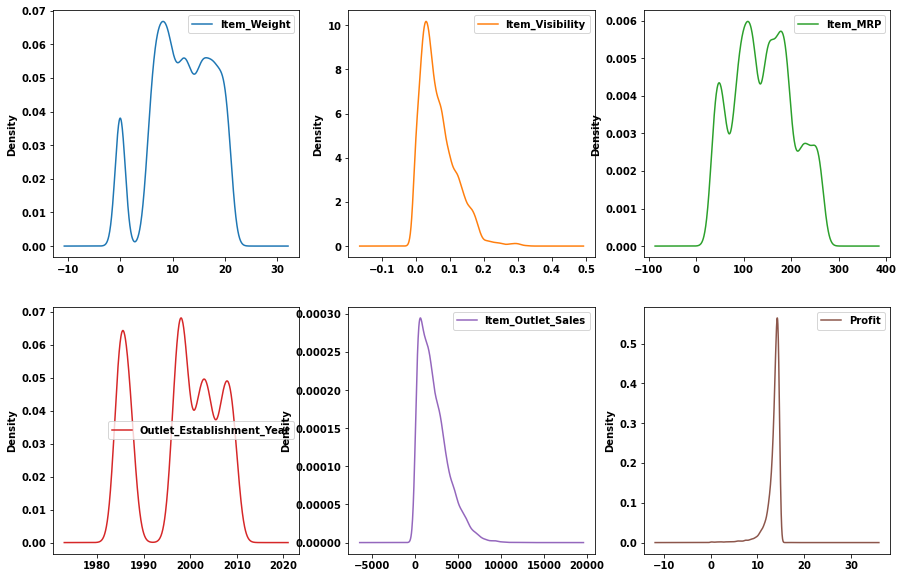

In [31]:
num_data.plot(kind='kde', subplots=True, layout=(2,3), sharex=False, figsize=(15, 10))
plt.show()

(array([3.280e+03, 2.448e+03, 1.527e+03, 7.290e+02, 3.590e+02, 1.240e+02,
        3.600e+01, 1.600e+01, 2.000e+00, 2.000e+00]),
 array([   33.29   ,  1338.65748,  2644.02496,  3949.39244,  5254.75992,
         6560.1274 ,  7865.49488,  9170.86236, 10476.22984, 11781.59732,
        13086.9648 ]),
 <BarContainer object of 10 artists>)

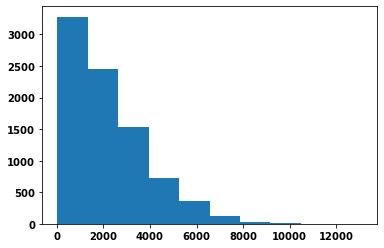

In [34]:
plt.hist(data['Item_Outlet_Sales'])

(array([[1.400e+01, 1.800e+01, 2.900e+01, 5.600e+01, 2.560e+02, 2.342e+03,
         5.630e+02, 0.000e+00, 0.000e+00, 2.000e+00],
        [8.000e+00, 6.000e+00, 1.600e+01, 4.500e+01, 1.920e+02, 1.758e+03,
         4.220e+02, 0.000e+00, 0.000e+00, 1.000e+00],
        [8.000e+00, 5.000e+00, 1.300e+01, 3.100e+01, 1.320e+02, 1.038e+03,
         2.990e+02, 0.000e+00, 1.000e+00, 0.000e+00],
        [2.000e+00, 4.000e+00, 4.000e+00, 2.100e+01, 5.300e+01, 5.070e+02,
         1.370e+02, 1.000e+00, 0.000e+00, 0.000e+00],
        [2.000e+00, 2.000e+00, 4.000e+00, 6.000e+00, 2.400e+01, 2.490e+02,
         7.200e+01, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.100e+01, 9.300e+01,
         1.800e+01, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.000e+00, 2.200e+01,
         8.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.100e+01,
         1.000e+00, 0.

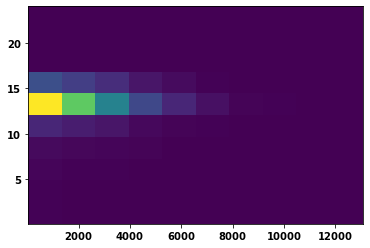

In [40]:
plt.hist2d(data['Item_Outlet_Sales'], data['Profit'])

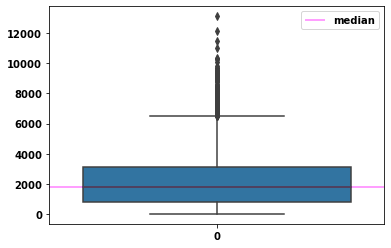

In [50]:
# Box plot gives the below
# 				1. Low bound = either Q1-1.5*IQR or Min value when Min < Q1-1.5*IQR
# 				2. Q1
# 				3. Median
# 				4. Q3
# 				5. Upper bound = Q3+1.5*IQR


sns.boxplot(data=data['Item_Outlet_Sales'])
plt.hlines(y=data['Item_Outlet_Sales'].quantile(.5), xmin=-.5, xmax=+.5, label='median', colors=[1, 0, 1, .5])
plt.legend(loc='best')

### Univariate analysis for Categorical Data

In [51]:
cat_data['Item_Identifier'].nunique()

1559

In [52]:
cat_data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCQ06     9
NCY18     9
FDF56     9
         ..
FDN52     1
FDQ60     1
DRF48     1
FDE52     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [53]:
for col in cat_data.columns:
    print(cat_data[col].value_counts())

FDW13    10
FDG33    10
NCQ06     9
NCY18     9
FDF56     9
         ..
FDN52     1
FDQ60     1
DRF48     1
FDE52     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Medium    279

In [54]:
cat_data['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg':'Regular'
}, inplace=True)

C:\ProgramData\Anaconda3\envs\tensorflow_gpu\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [55]:
cat_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [56]:
cat_data_vizualize = cat_data.drop(['Item_Identifier'], axis=1)

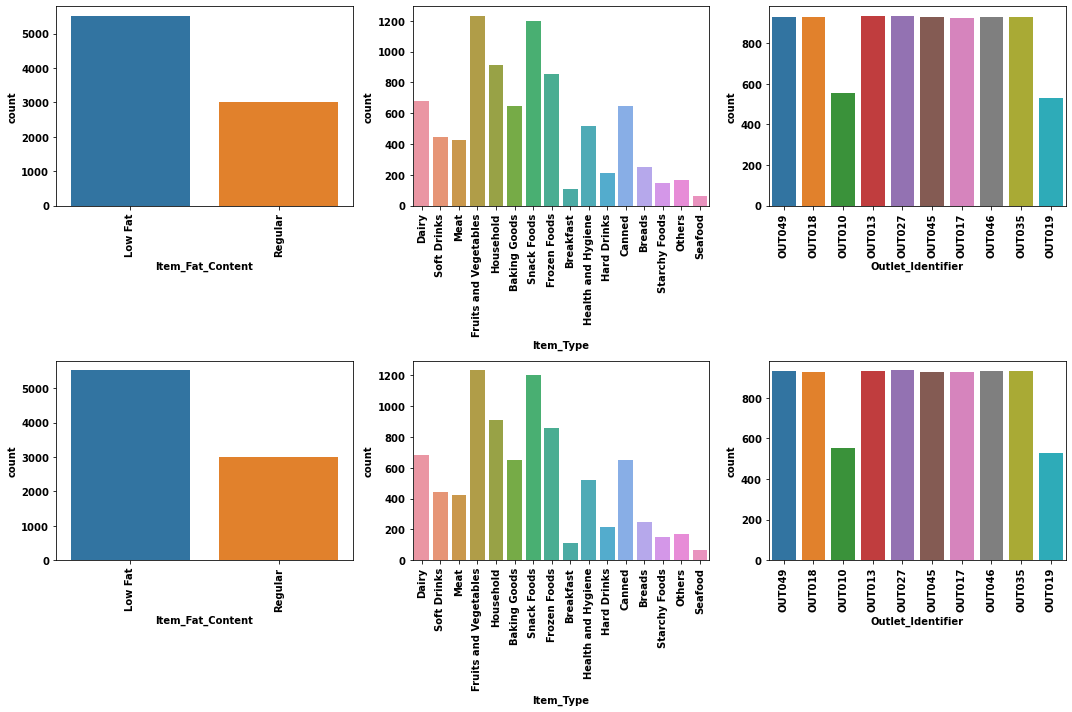

In [65]:
f, ax = plt.subplots(2, 3, figsize=(15, 10))
col_num=0
for row in [0, 1]:
    for col in [0, 1, 2]:
        z = sns.countplot(x=cat_data_vizualize.iloc[:, col], ax=ax[row, col])
        z.set_xticklabels(z.get_xticklabels(), rotation=90)
        col_num = col_num+1

plt.tight_layout()

### Bi-Variate Analysis
				1. Numerical data vs Categorical data
				2. Numerical data vs Numerical data
				3. Categorical data vs Categorical data


#### Numerical data vs Categorical data


In [68]:
data.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()

Outlet_Size
High      2298.995256
Medium    2681.603542
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

In [69]:
data['Item_Outlet_Sales'].mean()

2181.288913575032

In [70]:
data.groupby('Outlet_Size')['Profit'].mean()

Outlet_Size
High      13.428541
Medium    13.439599
Small     13.418132
Name: Profit, dtype: float64

In [71]:
data['Profit'].mean()

13.414513668895928

In [73]:
data.groupby('Outlet_Size')['Item_Outlet_Sales', 'Profit'].mean()

<ipython-input-73-e3f0c6fbc0a9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Outlet_Size')['Item_Outlet_Sales', 'Profit'].mean()


,Item_Outlet_Sales,Profit
Outlet_Size,,
High,2298.995256,13.428541
Medium,2681.603542,13.439599
Small,1912.149161,13.418132


C:\ProgramData\Anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

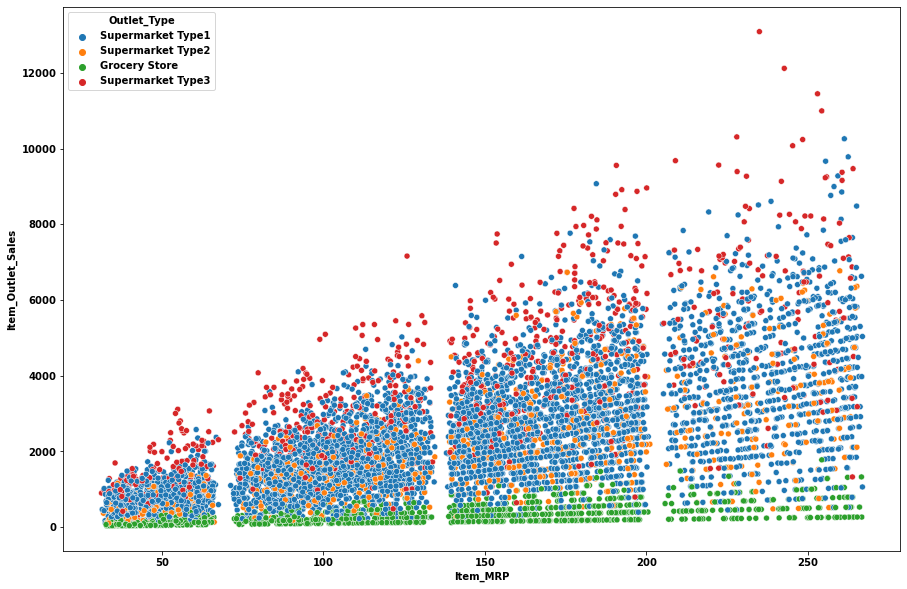

In [82]:
plt.figure(figsize=(15, 10))
sns.scatterplot('Item_MRP', 'Item_Outlet_Sales', data=data, hue='Outlet_Type')

C:\ProgramData\Anaconda3\envs\tensorflow_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

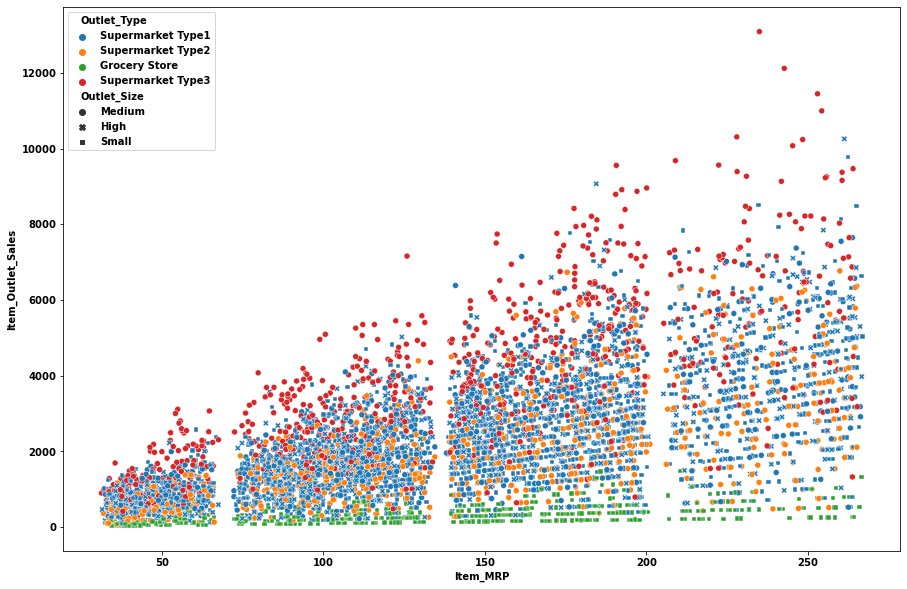

In [81]:
plt.figure(figsize=(15, 10))
sns.scatterplot('Item_MRP', 'Item_Outlet_Sales', data=data, hue='Outlet_Type', style=data['Outlet_Size'])


In [84]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

<AxesSubplot:xlabel='Item_Type'>

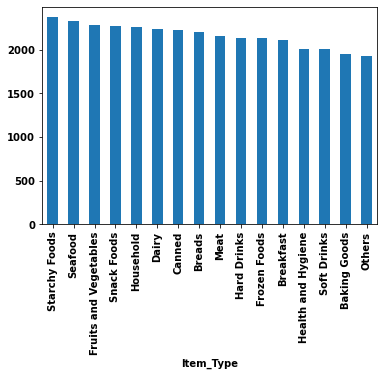

In [87]:
data.groupby(by='Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False).plot(kind='bar')